In [13]:
!pip install yfinance
!pip install plotly==4.5.2

     |████████████████████████████████| 7.1 MB 10.9 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [14]:
import pandas as pd
import numpy as np
import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

import plotly.graph_objects as go
from plotly.subplots import make_subplots

import itertools

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [3]:
stock_list = ['BABA', 'GOOG', 'MSFT', 'AMZN']
end = datetime.now()
start = datetime(end.year - 3, end.month, end.day)

for i in stock_list:
  src = yf.Ticker(i)
  globals()[i] = src.history(period='max', auto_adjust=True)
  globals()[i] = globals()[i][start:end]

In [4]:
BABA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 755 entries, 2018-08-08 to 2021-08-06
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          755 non-null    float64
 1   High          755 non-null    float64
 2   Low           755 non-null    float64
 3   Close         755 non-null    float64
 4   Volume        755 non-null    int64  
 5   Dividends     755 non-null    int64  
 6   Stock Splits  755 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 47.2 KB


In [5]:
BABA.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

#Membuat Fungsi Plot Price

In [6]:
company_list = [BABA, GOOG, MSFT, AMZN]
def plot_price (use_col):
  plt.figure(figsize=(15,8))
  for i, company in enumerate (company_list):
    plt.subplot(2,2,i+1)
    plt.suptitle(f"{use_col} Price")
    company[use_col].plot()
    plt.ylabel(stock_list[i])

MEMBUAT PLOT UNTUK CLOSE PRICE

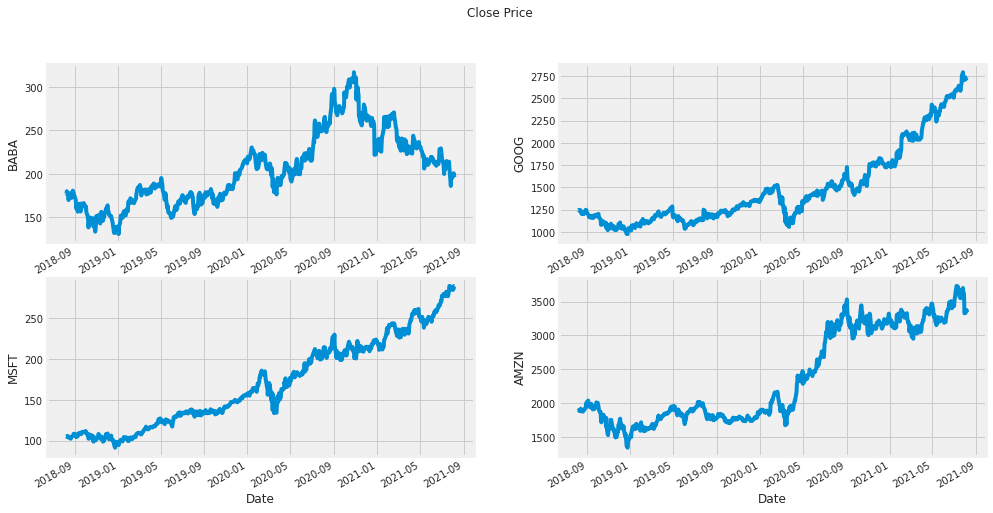

In [7]:
plot_price('Close')

Plot Volume

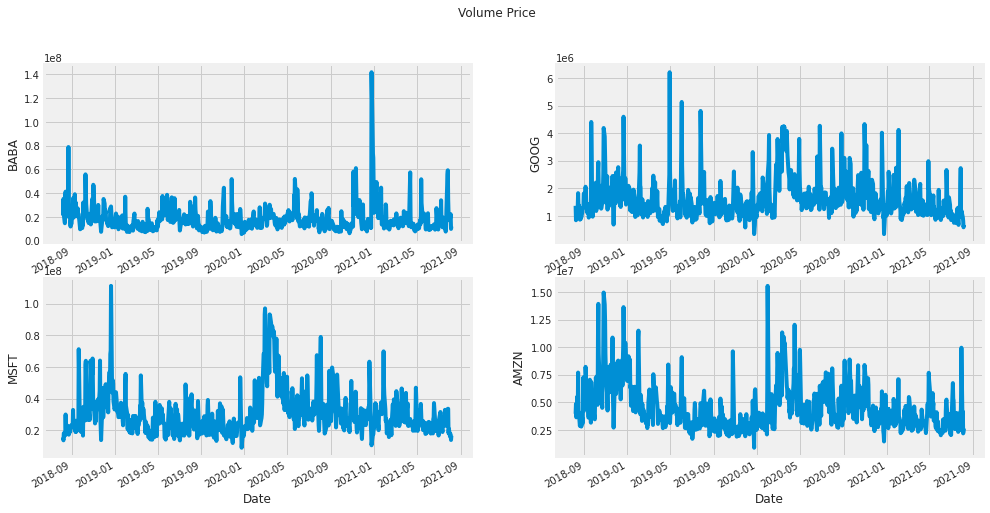

In [8]:
plot_price('Volume')

#**MOVING AVERAGE FOR CLOSE**

In [9]:
ma_list = [21, 60, 120]
for company in company_list:
  for col  in ma_list:
    company[f'MA-{col}'] = company['Close'].rolling(col).mean()

In [46]:
ma_col = ['Close', 'MA-21', 'MA-60', 'MA-120']
def plot_ma(company_name):
  fig = go.Figure()
  for col in ma_col:
    fig.add_trace(go.Scatter(x=company_name.index, y=company_name[col],mode='lines', name=f'{col}'))
  fig.show()

In [48]:
plot_ma(GOOG)

CORRELATION BETWEEN STOCKS CLOSE PRICE

In [74]:
df_close = pd.DataFrame()
for company in stock_list:
  df_close[company] = globals()[company]['Close']
df_close = pd.DataFrame(df_close)

In [76]:
df_close.head()

,BABA,GOOG,MSFT,AMZN
Date,,,,
2018-08-08,177.520004,1245.609985,105.410149,1886.520020
2018-08-09,177.190002,1249.099976,105.583435,1898.520020
2018-08-10,180.009995,1237.609985,104.938408,1886.300049
2018-08-13,177.679993,1235.010010,104.177834,1896.199951
2018-08-14,172.529999,1242.099976,105.477531,1919.650024


In [77]:
#persentase selisih antar index 
stock_rets = df_close.pct_change()
stock_rets.head()

,BABA,GOOG,MSFT,AMZN
Date,,,,
2018-08-08,NaN,NaN,NaN,NaN
2018-08-09,-0.001859,0.002802,0.001644,0.006361
2018-08-10,0.015915,-0.009199,-0.006109,-0.006437
2018-08-13,-0.012944,-0.002101,-0.007248,0.005248
2018-08-14,-0.028985,0.005741,0.012476,0.012367


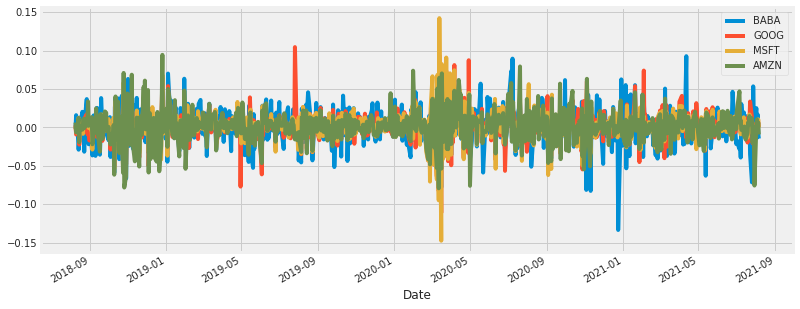

In [87]:
stock_rets.plot(figsize=(12,5))

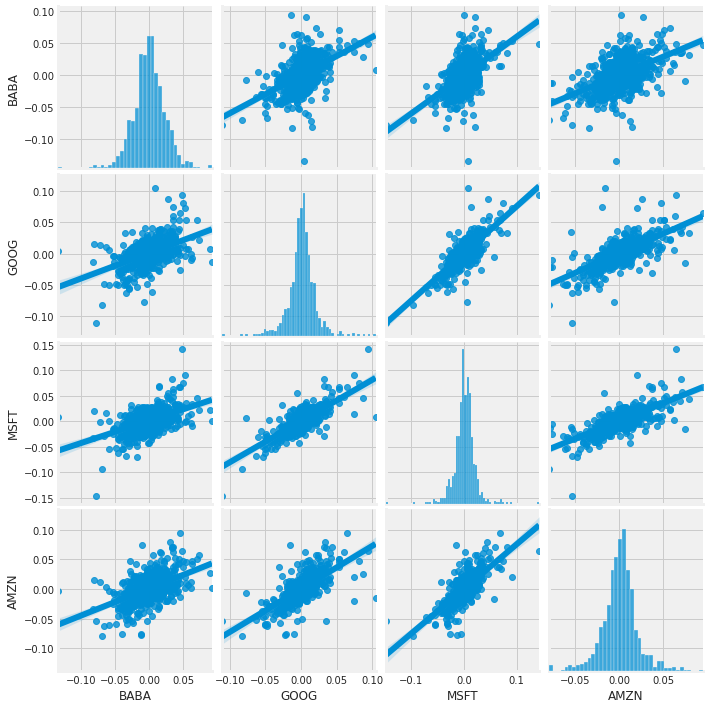

In [79]:
sns.pairplot(stock_rets, kind='reg')

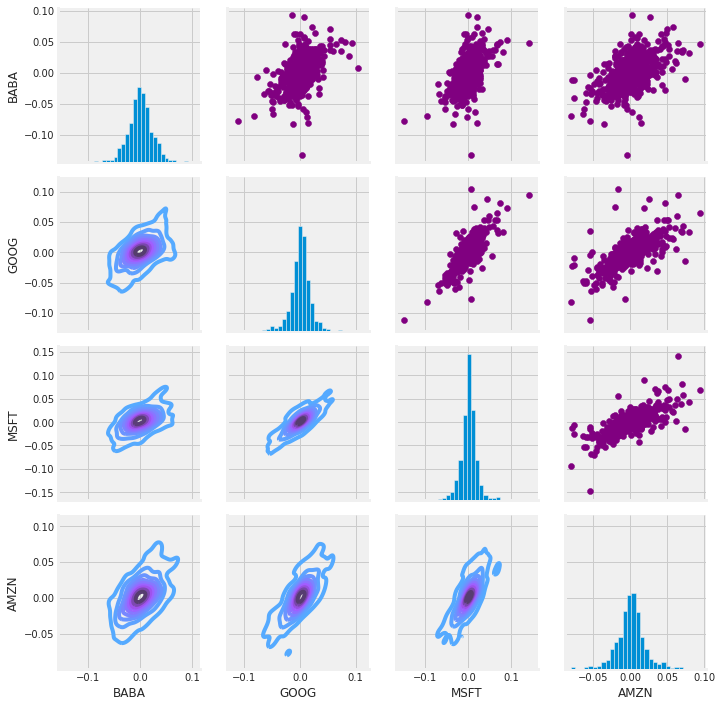

In [80]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(stock_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

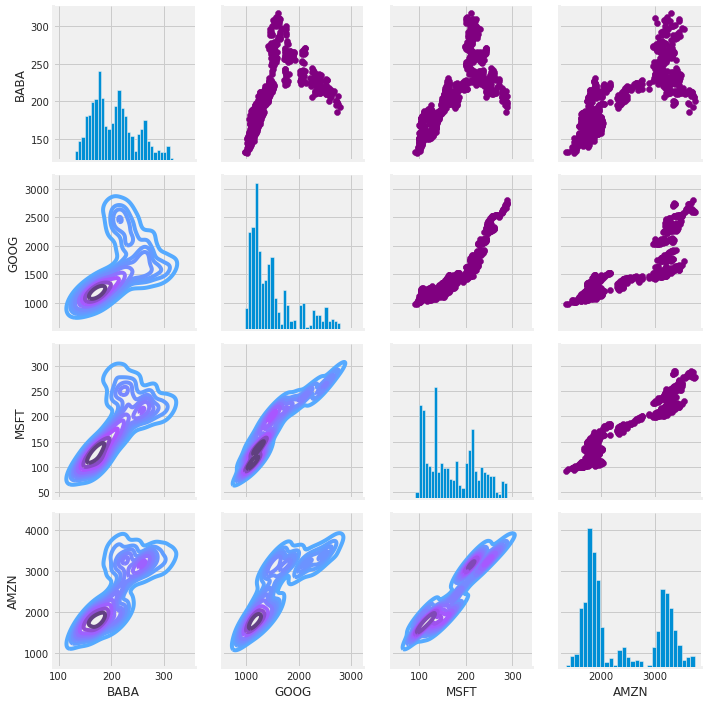

In [81]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(df_close)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Heatmap for corr()

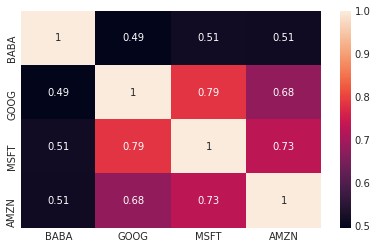

In [84]:
sns.heatmap(stock_rets.corr(), annot=True)

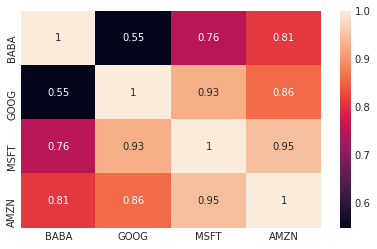

In [85]:
sns.heatmap(df_close.corr(), annot=True)

#Berapa nilai yang kita gunakan dengan berinvestasi pada saham tertentu?

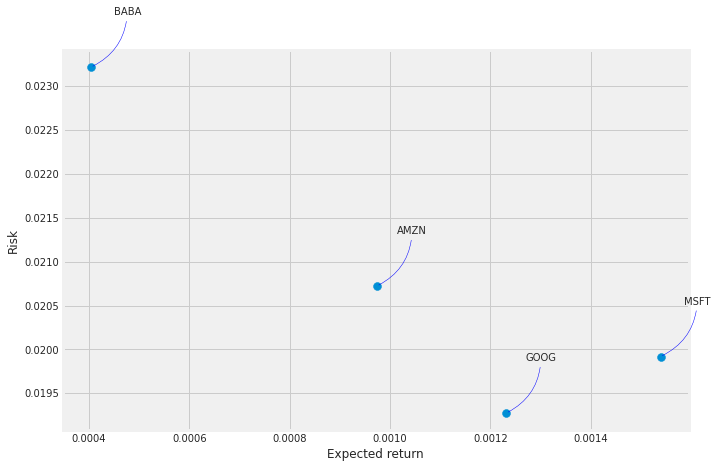

In [88]:
rets = stock_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))


So we have for the highest expected return is MSFT.

#Predict MSFT Price

In [91]:
MSFT.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA-21,MA-60,MA-120
Date,,,,,,,,,,
2018-08-08,105.256114,105.660462,104.707354,105.410149,15487500,0.0,0.0,NaN,NaN,NaN
2018-08-09,105.621945,106.055182,105.516044,105.583435,13677200,0.0,0.0,NaN,NaN,NaN
2018-08-10,105.342756,105.602699,104.341508,104.938408,18183700,0.0,0.0,NaN,NaN,NaN
2018-08-13,105.169452,105.496787,104.071932,104.177834,18472500,0.0,0.0,NaN,NaN,NaN
2018-08-14,104.514794,105.660454,104.014173,105.477531,16788300,0.0,0.0,NaN,NaN,NaN


In [93]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=MSFT.index, y=MSFT['Close'], mode='lines', name='Close'))
fig.add_trace(go.Scatter(x=MSFT.index, y=MSFT['MA-21'], mode='lines', name='MA-21'))
fig.add_trace(go.Scatter(x=MSFT.index, y=MSFT['MA-60'], mode='lines', name='MA-60'))
fig.add_trace(go.Scatter(x=MSFT.index, y=MSFT['MA-120'], mode='lines', name='MA-120'))
fig.update_layout(title='MSFT Price')
fig.show()

#Using Close data for prediction

In [162]:
data = MSFT.filter(['Close'])
dataset = data.values
dataset

array([[105.41014862],
       [105.58343506],
       [104.9384079 ],
       [104.17783356],
       [105.47753143],
       [104.04719543],
       [104.02787781],
       [103.96990967],
       [103.28371429],
       [102.42359924],
       [103.46733856],
       [103.95056152],
       [104.76236725],
       [105.92209625],
       [106.55995941],
       [108.26089478],
       [108.19325256],
       [108.56049347],
       [107.96129608],
       [104.84934235],
       [105.09095764],
       [104.57874298],
       [105.70949554],
       [107.50706482],
       [107.96129608],
       [109.12103271],
       [109.5655899 ],
       [108.3768692 ],
       [109.41095734],
       [107.95161438],
       [109.75888062],
       [110.4257431 ],
       [110.82195282],
       [110.60934448],
       [110.15512848],
       [110.5707016 ],
       [110.53204346],
       [111.7304306 ],
       [111.28585815],
       [111.30518341],
       [109.00505066],
       [108.36721039],
       [107.13015747],
       [108

Scaling data

In [151]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range=(0,1))
scaled_data = minmax.fit_transform(dataset)

In [152]:
# how many days do i want to base my predictions on ?
prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x - prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [175]:
from keras.models import Sequential
from keras import layers

# Build the LSTM model
model = Sequential([
                    layers.LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)),
                    layers.LSTM(64, return_sequences=False),
                    layers.Dense(25),
                    layers.Dense(1)
                    ])

In [154]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 60, 128)           66560     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_4 (Dense)              (None, 25)                1625      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 26        
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [176]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [178]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
695/695 [==============================] - 21s 31ms/step - loss: 0.0016
Epoch 2/10
695/695 [==============================] - 21s 30ms/step - loss: 0.0011
Epoch 3/10
695/695 [==============================] - 21s 31ms/step - loss: 0.0013
Epoch 4/10
695/695 [==============================] - 21s 31ms/step - loss: 6.5400e-04
Epoch 5/10
695/695 [==============================] - 21s 31ms/step - loss: 7.9924e-04
Epoch 6/10
695/695 [==============================] - 21s 30ms/step - loss: 6.5359e-04
Epoch 7/10
695/695 [==============================] - 21s 30ms/step - loss: 6.5753e-04
Epoch 8/10
695/695 [==============================] - 21s 30ms/step - loss: 6.0109e-04
Epoch 9/10
695/695 [==============================] - 21s 30ms/step - loss: 6.3601e-04
Epoch 10/10
695/695 [==============================] - 21s 30ms/step - loss: 6.5818e-04


In [179]:
# test model accuracy on existing data
test_data = data['2021-01-01':]

actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = minmax.transform(model_inputs)

In [180]:
x_test = []
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1] ,1))

predicted_prices = model.predict(x_test)
predicted_prices = minmax.inverse_transform(predicted_prices)

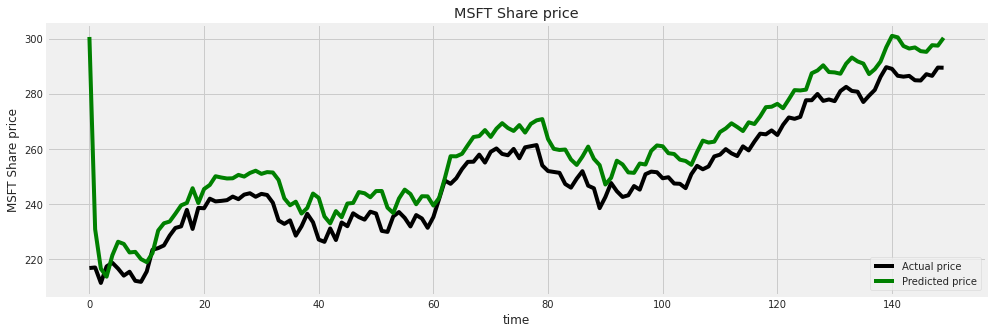

In [188]:
plt.figure(figsize=(15,5))
plt.plot(actual_prices, color='black', label="Actual price")
plt.plot(predicted_prices, color= 'green', label="Predicted price")
plt.title("MSFT Share price")
plt.xlabel("time")
plt.ylabel("MSFT Share price")
plt.legend()
plt.show()